2
2


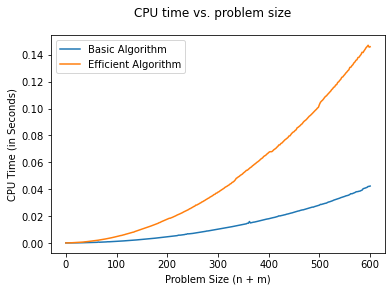

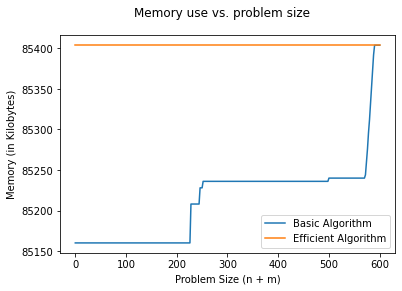

In [8]:
import basic, efficient, random
from matplotlib import pyplot as plt
from psutil import Process

%matplotlib inline

def generate_test_string(n):
    return [''.join(random.choices(['A', 'C', 'G', 'T'], k=i)) for i in range(n+1)]
        
def generate(g1, g2, f):
    cpu_y_axis, mem_y_axis = [], []

    for str1, str2 in zip(g1, g2):
        _, _, time_usage, memory_usage = f.main(str1, str2)
        cpu_y_axis.append(time_usage)
        mem_y_axis.append(memory_usage)
    
    return cpu_y_axis, mem_y_axis
                    
def plot(x_axis, basic_cpu, basic_mem, efficient_cpu, efficient_mem):
    plt.suptitle(f'CPU time vs. problem size')
    plt.plot(x_axis, basic_cpu, label='Basic Algorithm')
    plt.plot(x_axis, efficient_cpu, label='Efficient Algorithm')
    plt.legend()
    plt.ylabel('CPU Time (in Seconds)')
    plt.xlabel('Problem Size (n + m)')
    plt.show()
    
    plt.suptitle(f'Memory use vs. problem size')
    plt.plot(x_axis, basic_mem, label='Basic Algorithm')
    plt.plot(x_axis, efficient_mem, label='Efficient Algorithm')
    plt.legend()
    plt.ylabel('Memory (in Kilobytes)')
    plt.xlabel('Problem Size (n + m)')
    plt.show()


n = 300

gen1, gen2 = generate_test_string(n), generate_test_string(n)

print(len(generate(gen1, gen2, basic)) )
print(len(generate(gen1, gen2, efficient)))
plot([i+i for i in range(n+1)], *generate(gen1, gen2, basic), *generate(gen1, gen2, efficient))
